
### Steps
* Choose a class of model
* Choose model hyper-parameters 
#### The above two steps are very imp part of machine learning

* Train the model
* Use the model to predict new labels

#### Model Validation
* Is your model good enough for production

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

In [5]:
#model training
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [6]:
#prediction
y_model = model.predict(X)

In [7]:
#predicted results
y_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### To find out, how good our algo is doing - we have to use validation

In [8]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y,y_model)
#100 percent

1.0

In [9]:

import pandas as pd

In [10]:
f = pd.DataFrame(X)

In [11]:
y_actual = pd.DataFrame(y)

In [12]:
y_pred = pd.DataFrame(y_model)

In [13]:
res = pd.concat([f, y_actual, y_pred], axis=1)

In [14]:
res.head()

0    1    2    3  0  0
0  5.1  3.5  1.4  0.2  0  0
1  4.9  3.0  1.4  0.2  0  0
2  4.7  3.2  1.3  0.2  0  0
3  4.6  3.1  1.5  0.2  0  0
4  5.0  3.6  1.4  0.2  0  0

In [15]:
res.columns = ['f1','f2','f3','f4','y_actual','y_pred']

In [16]:
res.head()

f1   f2   f3   f4  y_actual  y_pred
0  5.1  3.5  1.4  0.2         0       0
1  4.9  3.0  1.4  0.2         0       0
2  4.7  3.2  1.3  0.2         0       0
3  4.6  3.1  1.5  0.2         0       0
4  5.0  3.6  1.4  0.2         0       0

#### Ofcourse, you don't want to test model with training data to avoid memorization

In [17]:
from sklearn.model_selection import train_test_split
X1,X2,y1,y2 = train_test_split(X,y, random_state=0, train_size=0.5) 
#Div data into two parts, one part will be used for training & other for validation
#train_size = 0.5 , means 50%

In [18]:
X1.shape

(75, 4)

In [19]:
X2.shape

(75, 4)

In [20]:
y1.shape

(75,)

In [21]:
y2.shape

(75,)

In [22]:
model.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
y2_model = model.predict(X2)

In [24]:
y2_model

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 1])

In [25]:

accuracy_score(y2,y2_model)
#90 % accuracy

0.90666666666666662

In [26]:
### Cross Validation
from sklearn.cross_validation import cross_val_score

C:\Users\omc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:

scores = cross_val_score(model,X,y,cv=5)

In [28]:
scores

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

<img src="https://camo.githubusercontent.com/ccae8eb06af74bb572063cf5c23140372ee71236/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d352d666f6c642d43562e706e67"> 

In [29]:

scores.mean()

0.95999999999999996

### Selection of best model
#### If our estimator is not doing good, how can we plan forward
* Use a more complicated/flexible model
* Get more training data
* Get more data to add features to each sample

### The Bias-Variance trade-off

<img src="https://camo.githubusercontent.com/601b1f76ea0c8dead27426ab28f6abcc433935a7/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d626961732d76617269616e63652e706e67">

* Underfit has high bias
* Over fit have high variance
* We have to find the right combination of these two

<img src="https://camo.githubusercontent.com/dbc1795f11761529546f012dffd884179d375357/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d76616c69646174696f6e2d63757276652e706e67">

* The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
* For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
* For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
* For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.


##### Validation curves in Scikit-learn
* y = ax3+bx2+cx+d
* y = ax + b

In [30]:

#Create higher degree models
from sklearn.preprocessing import PolynomialFeatures

#Create Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create pipeline for finding the best model
from sklearn.pipeline import make_pipeline

In [31]:

# Function to create models
# kwargs contains hyper-parameters
# make_pipeline - Create pipeline of transformers & estimators
# Transformers will change data from one format to another such that they can be consumed by machine learning algorithms
# Estimators - model

# Transformers - PolynomialFeatures
# Estimators - LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [32]:
#### Function to gerenarte data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [33]:
X
np.ravel(X)

array([  1.73907352e-01,   5.18867376e-01,   1.30815988e-08,
         9.14049845e-02,   2.15372915e-02,   8.52641608e-03,
         3.46928663e-02,   1.19412216e-01,   1.57424429e-01,
         2.90323473e-01,   1.75724041e-01,   4.69525764e-01,
         4.18007224e-02,   7.71090232e-01,   7.50080261e-04,
         4.49526682e-01,   1.74143298e-01,   3.12134324e-01,
         1.97084925e-02,   3.92442000e-02,   6.41191864e-01,
         9.37530479e-01,   9.82347155e-02,   4.79310604e-01,
         7.68057946e-01,   8.00321082e-01,   7.23251789e-03,
         1.52527609e-03,   2.88423714e-02,   7.71134256e-01,
         9.67209972e-03,   1.77331632e-01,   9.17552352e-01,
         2.84265221e-01,   4.78693941e-01,   9.95501134e-02,
         4.71283524e-01,   6.96600012e-01,   3.34461088e-04,
         5.62716493e-01])

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

In [35]:
X_test = np.linspace(-0.1, 1.1, 500)

In [36]:
X_test = X_test[:,np.newaxis]

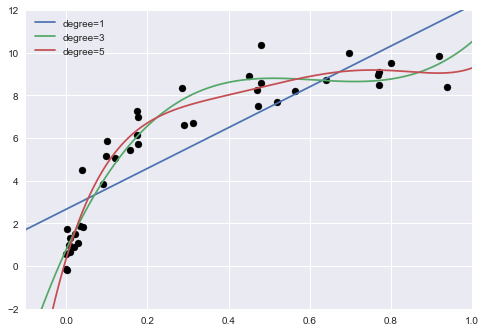

In [38]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');